# Отчет по лабораторной работе №6
### Выполнил Гвоздков Егор



## Вариант №3

Решить методом Тейлора 4-го порядка задачу Коши

$$
y'''-4y=\sin x \cdot \exp(-x),\quad y(0)=1, y'(0)=0, y''(0)=0,\quad x\in[0,2]
$$

с заданной относительной точностью 0.01.
Требуется построение графиков решения $y(x)$, $y'(x)$, $y''(x)$. В задании не сказано про вторую производную, на всякий построю и её. А также графики фазовых траекторий.

### Преобразование ДУ 3-го порядка к трем ДУ 1-го порядка
Я переобозначил $y\to y,\quad y' \to p, \quad y''\to p', \quad y''' \to q'$, тогда ДУ приводится к системе

$$
\begin{cases}
y'=p=f(y,p,q,x),\quad y(0)=1\\
p'=q=g(y,p,q,x),\quad p(0)=0\\
q'=4y+\sin x \cdot \exp(-x)=h(y,p,q,x),\quad q(0)=0
\end{cases}%,\qquad i=2,3,\ldots, n
$$

## Метод Тейлора 4-го порядка

Метод разложения в ряд Тейлора можно применить покомпонентно. Я рассмотрю для произвольной функции $y(x)$ (для такой общности ДУ представлю в виде $y'=f(y,p,q,x)$ разложение в ряд Тейлора в окрестности точки $x_n$ до 4 члена включительно:

$$
y(x_n+h)=y(x_n)+h\frac{dy}{dx}+\frac{h^2}{2}\frac{d^2y}{dx^2}+\frac{h^3}{3}\frac{d^3y}{dx^3}+\frac{h^4}{24}\frac{d^4y}{dx^4}
$$

Я расписываю производные:

$$
\begin{gather}
\frac{dy}{dx}=f\\
F=\frac{d^2y}{dx^2}=\frac{df}{dx}=\frac{\partial f}{\partial y}y'+
\frac{\partial f}{\partial p}p'+
\frac{\partial f}{\partial q}q'+
\frac{\partial f}{\partial x}\\
G=\frac{d^3y}{dx^3}=\frac{dF}{dx}=\frac{\partial F}{\partial y}y'+
\frac{\partial F}{\partial p}p'+
\frac{\partial F}{\partial q}q'+
\frac{\partial F}{\partial x}\\
\frac{d^4y}{dx^4}=\frac{dG}{dx}=\frac{\partial G}{\partial y}y'+
\frac{\partial G}{\partial p}p'+
\frac{\partial G}{\partial q}q'+
\frac{\partial G}{\partial x}\\
\end{gather}
$$

Здесь конечно я подразумеваю что производные берутся в точке $x_n$.

Распишу для моей системы производные компоненты $y$:

$$
\begin{gather}
\frac{dy}{dx}=p\\
\frac{d^2y}{dx^2}=q\\
\frac{d^3y}{dx^3}=4y+\sin x \cdot \exp(-x)\\
\frac{d^4y}{dx^4}=4p+ \exp(-x)(\cos x - \sin x)
\end{gather}
$$

Распишу для моей системы производные компоненты $p$:

$$
\begin{gather}
\frac{dp}{dx}=q\\
\frac{d^2p}{dx^2}=4y+\sin x \cdot \exp(-x)\\
\frac{d^3p}{dx^3}=4p+ \exp(-x)(\cos x - \sin x)\\
\frac{d^4p}{dx^4}=4q-2\cos x \cdot  \exp(-x)
\end{gather}
$$

Распишу для моей системы производные компоненты $q$:

$$
\begin{gather}
\frac{dq}{dx}=4y+\sin x \cdot \exp(-x)\\
\frac{d^2q}{dx^2}=4p+ \exp(-x)(\cos x - \sin x)\\
\frac{d^3q}{dx^3}=4q-2\cos x \cdot  \exp(-x)\\
\frac{d^4q}{dx^4}=16y+6\sin x \cdot \exp(-x)+2 \exp(-x)\cos x
\end{gather}
$$

Импорт библиотек

In [1]:
import numpy as np
from numpy import sin,cos,exp
from matplotlib import pyplot as plt
from numpy.linalg import norm

Массив Xrange дает два значения - от какого (xmin) и до какого (xmax) x ищется решение ДУ, массив YPQ0 дает начальные значения Y(x=xmin), P(x=xmin), Q(x=xmin).

In [2]:
Xrange=[0,2]
YPQ0=[1,0,0]

Для того, чтобы найти решение с необходимой точностью, я написал функцию Teilor(count,time,beg), которая возвращает решение (массив времени x, переменных y,p,q и шаг разбиения).

count здесь это количество отрезочков, на которые разбивается отрезок времени Xrange xmin..xmax.

Таким образом, я смогу сравнивать решения с некоторым начальным разбиением на N отрезков и вторым на 2N, и так далее, пока расстояние между решениями не начнет удовлетворять условиям погрешности.

Код работает следующим образом: задается шаг исходя из заданного количества разбиений отрезка времени, и в цикле по выведенным выше формулам y(x+h)=y(x)+...(), аналогично p и q.

На каждой итерации используется только предыдущие значения y p q, поэтому я их перезаписываю и каждый момент времени у меня есть только y,p,q текущие значения и y2,p2,q2 предыдущие. 

Также на каждой итерации я добавляю y,p,q,x в соответствующие массивы.

In [3]:
def Teilor(count,time,beg):
    xmin,xmax=time # пределы времени
    y,p,q=beg # начальные условия
    h=xstep=(xmax-xmin)/(2**count) # вычисляем шаг
    x=xmin # начальное значение x=xmin
    N=0
    X=np.array([x])
    Y=np.array([y])

    P=np.array([p])
    Q=np.array([q])
    while x<xmax:
        x=x+xstep
        N+=1
        
        y2=y+h*p+h**2/2*q+h**3/6*(4*y + exp(-x)*sin(x))+\
            h**4/24*(4*p-exp(-x)*sin(x)+exp(-x)*cos(x))
        
        p2=p+h*q+h**2/2*(4*y + exp(-x)*sin(x))+h**3/6*(4*p - exp(-x)*sin(x) + exp(-x)*cos(x))+\
            h**4/24*(4*q - 2*exp(-x)*cos(x))
        
        q2=q+h*(4*y + exp(-x)*sin(x))+h**2/2*(4*p - exp(-x)*sin(x) + exp(-x)*cos(x))+\
            h**3/6*(4*q - 2*exp(-x)*cos(x))+h**4/24*(16*y + 6*exp(-x)*sin(x) + 2*exp(-x)*cos(x))
        
        y,p,q=y2,p2,q2
        X=np.append(X,x)
        Y=np.append(Y,y)
        P=np.append(P,p)
        Q=np.append(Q,q)
    return [X,Y,P,Q,xstep]
        

## Итерационный процесс
Я сравниваю решения с некоторым начальным разбиением на N=1 отрезков и вторым на 2N, и так далее, пока расстояние между решениями не начнет удовлетворять условиям погрешности.

В качестве расстояния между отрезками я подразумеваю сумму норм разностей текущего и предыдущего p,q,y. Так как текущее у меня всегда вдвое больше предыдущего, я беру из текущего только каждое второе значение: это делает код <code>P[0::2]</code> который например из массива P вырежет каждый второй элемент. 

In [4]:
eps=0.01
N=0

while True:
    T=Teilor(N,Xrange,YPQ0)
    T2=Teilor(N+1,Xrange,YPQ0)
    myeps=(norm(T[1]-T2[1][0::2])+norm(T[2]-T2[2][0::2])+norm(T[3]-T2[3][0::2]))/(norm(T2[1])+norm(T2[2])+norm(T2[3]))
    N=N+1
    if myeps<eps:
        break
X,Y,P,Q,xstep=T2

Дополнительно я решил вcтроенной в SciPy функцией odeint мою систему, чтобы проверить что мой код верно работает: 

In [12]:
def pend(args, x):
    y,p,q = args
    dydt = [p,q,4*y+sin(x)*exp(-x)]
    return dydt

from scipy.integrate import odeint
XX=X
sol = odeint(pend, YPQ0, XX)
YY=sol[:,0]
PP=sol[:,1]
QQ=sol[:,2]

## Графики решения и фазовые портреты

Я строю все нужные по заданию графики.

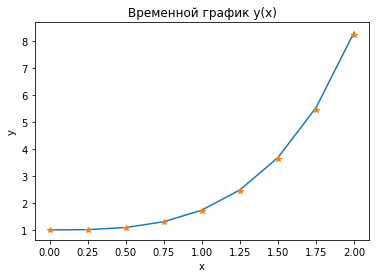

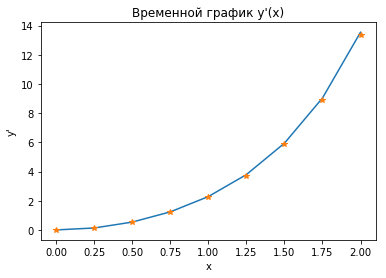

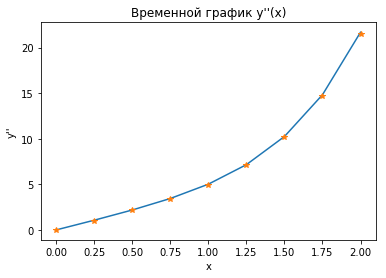

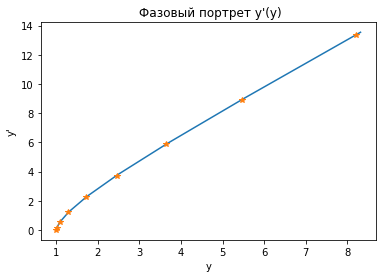

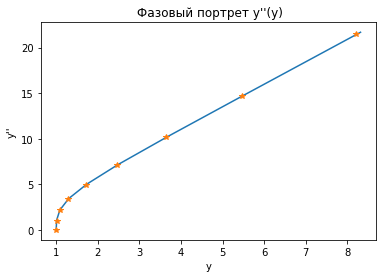

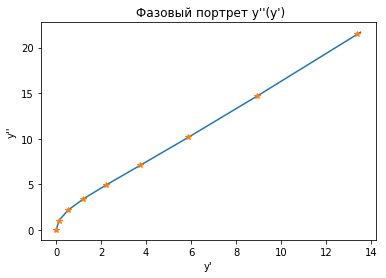

In [13]:
plt.plot(X,Y)
plt.plot(X,YY,'*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Временной график y(x)')
plt.show()

plt.plot(X,P)
plt.plot(X,PP,'*')
plt.xlabel('x')
plt.ylabel("y'")
plt.title("Временной график y'(x)")
plt.show()

plt.plot(X,Q)
plt.plot(X,QQ,'*')
plt.xlabel('x')
plt.ylabel("y''")
plt.title("Временной график y''(x)")
plt.show()


plt.plot(Y,P)
plt.plot(YY,PP,'*')
plt.xlabel("y")
plt.ylabel("y'")
plt.title(" Фазовый портрет y'(y)")
plt.show()

plt.plot(Y,Q)
plt.plot(YY,QQ,'*')
plt.xlabel("y")
plt.ylabel("y''")
plt.title(" Фазовый портрет y''(y)")
plt.show()

plt.plot(P,Q)
plt.plot(PP,QQ,'*')
plt.xlabel("y'")
plt.ylabel("y''")
plt.title(" Фазовый портрет y''(y')")
plt.show()

## Разностные графики
А также так как есть решение встроенными функциями, я построил разностные графики, например для y,p,q:

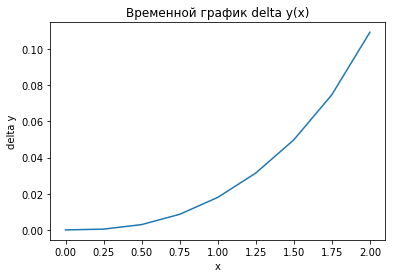

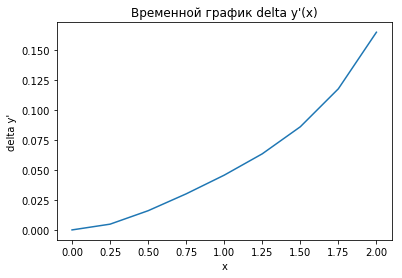

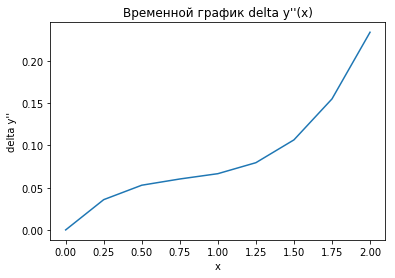

In [14]:
plt.plot(X,Y-YY)
plt.xlabel('x')
plt.ylabel('delta y')
plt.title('Временной график delta y(x)')
plt.show()

plt.plot(X,P-PP)
plt.xlabel('x')
plt.ylabel("delta y'")
plt.title("Временной график delta y'(x)")
plt.show()

plt.plot(X,Q-QQ)
plt.xlabel('x')
plt.ylabel("delta y''")
plt.title("Временной график delta y''(x)")
plt.show()

Из графика можно оценить например для y(x) максимальную отн. погрешность, она равна 0.1/8 (delta y/y), это примерно 0.0125. Это капельку выше чем заданная мной погрешность, но это при том, что встроенное решение тоже имеет свою погрешность, а также я сравниваю для расчета погрешности не свое и истинное решения, а два своих соседних (некое и некое на построенной в два раза более мелкой сетке).

In [6]:
print('Относительная ошибка решения', myeps)
print('Количество шагов итерации',N)
print('Длина шага по x',xstep)

Относительная ошибка решения 0.0026648392238807755
Количество шагов итерации 3
Длина шага по x 0.25


## Заключение

Методом Тейлора 4-го порядка я получил решение за 3 итерации с относительной погрешностью 0.00266 (если вводить погрешность как отношение расстояния (нормы) между соседними по разбиениям (на N и 2N частей) решений к норме одного из них), при этом шаг итерации составлял 0.25.

Также я отдельно провел необходимые математические вычисления (с помощью вольфрам альфа), и вывел нужную для итерационного процесса формулу исходя из разложения Тейлора.

В конце я построил все необходимые графики решения и фазовые портреты. Так же я на них же построил решение встроенными функциями, чтобы проверить верно ли мое решение. Видно, что они хорошо совпадают качественно, и также я для иллюстрации построил и разностные графики.